# House Prices Modeling (PW1)

In this practical work, we build a simple modeling pipeline for the Kaggle House Prices dataset.  
The steps include:

1. Dataset Loading  
2. Feature Selection  
3. Preprocessing  
4. Model Training  
5. Model Evaluation  

## Dataset Loading

In [4]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split

In [5]:

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("scikit-learn:", sklearn.__version__)

pandas: 2.3.3
numpy: 2.3.3
scikit-learn: 1.7.2


In [6]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")
train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=["SalePrice"])
y = train_df["SalePrice"]

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_valid.shape)


Training set shape: (1168, 80)
Validation set shape: (292, 80)


## Feature Selection
For better model performance, I selected the following features:

- **Continuous features:**
  - GrLivArea (above-ground living area in square feet)
  - OverallQual (overall material and finish quality, 1–10 scale)

- **Categorical features:**
  - Neighborhood (physical location within Ames city)
  - HouseStyle (style of dwelling, e.g., 1Story, 2Story)


In [8]:
# Select chosen features
selected_features = ["GrLivArea", "OverallQual", "Neighborhood", "HouseStyle"]

X_train_selected = X_train[selected_features].copy()
X_valid_selected = X_valid[selected_features].copy()

# Show a sample of the selected features
X_train_selected.head()


,GrLivArea,OverallQual,Neighborhood,HouseStyle
254,1314,5,NAmes,1Story
1066,1571,6,Gilbert,2Story
638,796,5,Edwards,1Story
799,1768,5,SWISU,1.5Fin
380,1691,5,SWISU,1.5Fin


## Preprocessing

- Continuous features scaled with StandardScaler  
- Categorical features encoded with pd.get_dummies  
- Combine both into final training and validation sets  

No Pipelines or ColumnTransformers used.  

In [9]:

# Separating continuous and categorical features

from sklearn.preprocessing import StandardScaler

continuous_features = ["GrLivArea", "OverallQual"]
categorical_features = ["Neighborhood", "HouseStyle"]

X_train_cont = X_train_selected[continuous_features]
X_valid_cont = X_valid_selected[continuous_features]

X_train_cat = X_train_selected[categorical_features]
X_valid_cat = X_valid_selected[categorical_features]


In [10]:
# scaling continous feature using StandardScaler, (meann = 0, std =1)

scaler = StandardScaler()

X_train_cont_scaled = scaler.fit_transform(X_train_cont)
X_valid_cont_scaled = scaler.transform(X_valid_cont)

# dataframe
X_train_cont_scaled = pd.DataFrame(X_train_cont_scaled, 
                                   columns=continuous_features, 
                                   index=X_train_cont.index)
X_valid_cont_scaled = pd.DataFrame(X_valid_cont_scaled, 
                                   columns=continuous_features, 
                                   index=X_valid_cont.index)


In [11]:
from sklearn.preprocessing import OneHotEncoder

# Initialize encoder
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# Fit on training data, transform both train and validation
X_train_cat_encoded = pd.DataFrame(
    encoder.fit_transform(X_train_cat),
    index=X_train_cat.index,
    columns=encoder.get_feature_names_out(X_train_cat.columns)
)

X_valid_cat_encoded = pd.DataFrame(
    encoder.transform(X_valid_cat),
    index=X_valid_cat.index,
    columns=encoder.get_feature_names_out(X_train_cat.columns)
)


In [12]:
X_train_processed = pd.concat([X_train_cont_scaled, X_train_cat_encoded], axis=1)
X_valid_processed = pd.concat([X_valid_cont_scaled, X_valid_cat_encoded], axis=1)

print("Training processed shape:", X_train_processed.shape)
print("Validation processed shape:", X_valid_processed.shape)
X_train_processed.head()



Training processed shape: (1168, 33)
Validation processed shape: (292, 33)


,GrLivArea,OverallQual,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
254,-0.407093,-0.820445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1066,0.083170,-0.088934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
638,-1.395250,-0.820445,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
799,0.458975,-0.820445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380,0.312087,-0.820445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X_valid_processed.head(10)

,GrLivArea,OverallQual,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
892,-0.876372,-0.088934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1105,2.088099,1.374088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
413,-0.952678,-0.820445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
522,0.260581,-0.088934,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1036,0.176644,2.105599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
614,-1.711918,-1.551955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
218,0.813796,0.642577,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1160,-0.136208,-0.088934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
649,-1.711918,-1.551955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
887,-0.256390,-0.820445,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Training


 ### Model Training & Predictions
 ## Model Training

used LinearRegression from sklearn.  
The model was trained on the processed training data.  
Predictions were made on the validation set. 

In [14]:
from sklearn.linear_model import LinearRegression

# Training  simple Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train_processed, y_train)

# Predicting on the validation set (for local evaluation in Task 6)
y_valid_pred = linreg.predict(X_valid_processed)

# Quick sanity check
print("First 5 validation predictions:", y_valid_pred[:5])



First 5 validation predictions: [149842.7851841  333480.82491429 108933.88597818 167315.8518652
 276913.65889771]


### For test set


In [15]:

selected_features = ["GrLivArea", "OverallQual", "Neighborhood", "HouseStyle"]

X_test_selected = test_df[selected_features].copy()

# 2) continuous / categorical
continuous_features = ["GrLivArea", "OverallQual"]
categorical_features = ["Neighborhood", "HouseStyle"]

X_test_cont = X_test_selected[continuous_features]
X_test_cat  = X_test_selected[categorical_features]

# 3) Scaling continuous features using the *already-fitted* scaler
X_test_cont_scaled = scaler.transform(X_test_cont)
X_test_cont_scaled = pd.DataFrame(
    X_test_cont_scaled, columns=continuous_features, index=X_test_cont.index
)

# 4) One-hot encode categoricals and align columns to the training set
X_test_cat_encoded = pd.get_dummies(X_test_cat, drop_first=True)

# training categorical columns (the ones used in X_train_processed)
# We need just the cat columns from train to align exactly:
train_cat_cols = [c for c in X_train_processed.columns if c not in continuous_features]

X_test_cat_encoded = X_test_cat_encoded.reindex(columns=train_cat_cols, fill_value=0)

# 5) scaled continuous + encoded categoricals
X_test_processed = pd.concat([X_test_cont_scaled, X_test_cat_encoded], axis=1)

print("Test processed shape:", X_test_processed.shape)
X_test_processed.head()


Test processed shape: (1459, 33)


,GrLivArea,OverallQual,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,-1.204486,-0.820445,False,False,False,False,False,False,False,False,...,False,False,False,False,True,0,False,False,False,False
1,-0.378479,-0.088934,False,False,False,False,False,False,False,False,...,False,False,False,False,True,0,False,False,False,False
2,0.193813,-0.820445,False,False,False,False,False,False,False,True,...,False,False,False,False,False,0,False,True,False,False
3,0.146122,-0.088934,False,False,False,False,False,False,False,True,...,False,False,False,False,False,0,False,True,False,False
4,-0.471953,1.374088,False,False,False,False,False,False,False,False,...,True,False,False,False,True,0,False,False,False,False


## prediction

In [16]:
# Predicted SalePrice for the Kaggle test set
test_pred = linreg.predict(X_test_processed)

# Ensured no negative predictions (rare for linear models but safe to clip)
test_pred = np.clip(test_pred, a_min=0, a_max=None)

submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_pred
})

submission.head()


,Id,SalePrice
0,1461,114632.152847
1,1462,164207.849169
2,1463,157147.926543
3,1464,174796.652237
4,1465,269438.831505


In [17]:
# Save the submission file 
submission_path = "../data/submission_linear.csv"  # stays out of git thanks to .gitignore
submission.to_csv(submission_path, index=False)
submission_path


'../data/submission_linear.csv'

## Model Evaluation


In [18]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)


In [19]:
# Compute RMSLE between actual SalePrice (y_valid) and predicted (y_valid_pred)
rmsle_score = compute_rmsle(y_valid, y_valid_pred)

print(" RMSLE on validation set:", rmsle_score)


 RMSLE on validation set: 0.18


### Task 6: Model Evaluation

The Root Mean Squared Logarithmic Error (RMSLE) on the validation set was **0.18**.  
A lower RMSLE indicates better model performance.  


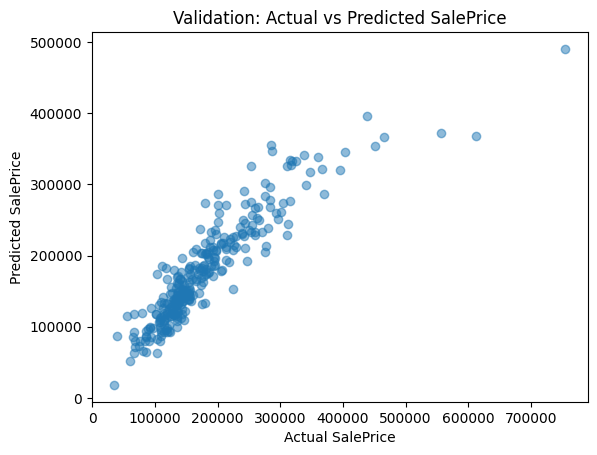

In [20]:
import matplotlib.pyplot as plt

plt.scatter(y_valid, y_valid_pred, alpha=0.5)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Validation: Actual vs Predicted SalePrice")
plt.show()


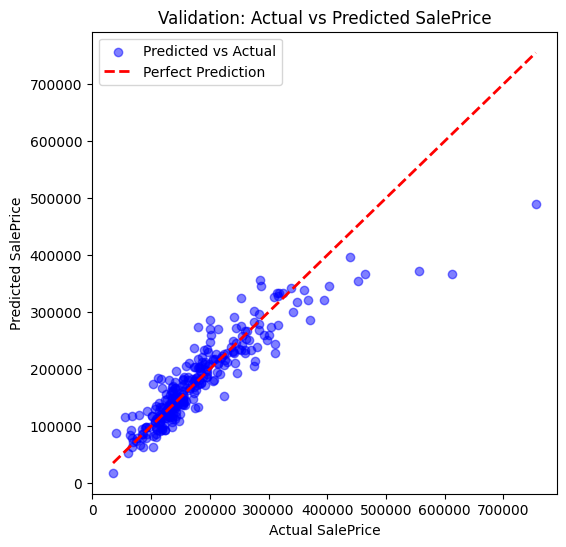

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

# Scatter plot of actual vs predicted
plt.scatter(y_valid, y_valid_pred, color="blue", alpha=0.5, label="Predicted vs Actual")

# Diagonal reference line (perfect prediction)
plt.plot([y_valid.min(), y_valid.max()],
         [y_valid.min(), y_valid.max()],
         color="red", linestyle="--", linewidth=2, label="Perfect Prediction")

plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Validation: Actual vs Predicted SalePrice")
plt.legend()
plt.show()


### Conclusion 

- I implemented a simple modeling pipeline using 2 continuous features (GrLivArea, OverallQual)  
  and 2 categorical features (Neighborhood, HouseStyle).  
- The continuous features were scaled, and categorical features were one-hot encoded.  
- I trained a Linear Regression model and evaluated it with RMSLE.  

The RMSLE on the validation set was **0.18**, which shows reasonable performance for a simple model.  



In [22]:
!pip install pyarrow --upgrade


In [23]:
import pyarrow
print(" PyArrow version:", pyarrow.__version__)

 PyArrow version: 21.0.0


In [24]:
processed_df = X_train_processed.copy() 
processed_df.to_parquet('../data/processed_df.parquet', index=False)
processed_df.head()

,GrLivArea,OverallQual,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
254,-0.407093,-0.820445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1066,0.083170,-0.088934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
638,-1.395250,-0.820445,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
799,0.458975,-0.820445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380,0.312087,-0.820445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
